# Turtle Soup

ДЛЯ ПОКУПКИ (ДЛЯ ПРОДАЖИ - НАОБОРОТ)
<ol>
<li>Сегодня должен быть сделан новый 20-дневный минимум — чем ниже, тем лучше.</li>
<li>Предыдущий 20-дневный минимум должен произойти по крайней мере на четыре
торговые сессии ранее. Это очень важно.</li>
<li>После того, как рынок упадет ниже <font color='#111a2e' style="background-color:#f7e98f;">предыдущего</font> 20-дневного минимума, разместите для
целей входа покупающий стоп на 5—10 тиков выше предыдущего 20-дневного минимума.
Этот покупающий стоп годится только на сегодня.</li>
<li>Если покупающий стоп исполняется, немедленно ставьте первоначальный действующий-
до-отмены продающий стоп-лосс на один тик ниже сегодняшнего минимума.</li>
<li>Когда позиция становится прибыльной, используйте плавающий стоп, чтобы
предотвратить потерю прибыли. Некоторые из этих сделок будут длиться два-три часа, а
некоторые — несколько дней. Из-за волатильности и шума 20-дневных максимумов и
минимумов каждый рынок ведет себя по-своему.</li>
<li>Правило повторного входа: если на первый или второй день существования сделки у
вас сработал стоп, вы можете войти повторно с помощью покупающего стопа на
первоначальном уровне входа (только на первый или на второй день). Это должно
несколько увеличить вашу прибыль.</li>
</ol>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(15, 9))

In [4]:
def truncate(number):
    return math.floor(number * 10 ** 2) / 10 ** 2

In [5]:
spy_df = pd.read_csv('../../../data/SPY_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
spy_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-12-23,378.206578,381.603617,376.592742,381.454193,59857300,0.0,0.0,0.0
2022-12-27,381.334651,381.693267,378.206574,379.949921,51638200,0.0,0.0,0.0
2022-12-28,379.880163,381.932359,374.988858,375.227936,70911500,0.0,0.0,0.0
2022-12-29,378.186666,382.888722,377.638738,381.982178,66970900,0.0,0.0,0.0
2022-12-30,379.192810,381.125406,376.991191,380.975983,84022200,0.0,0.0,0.0


In [6]:
spy_close = spy_df['Close'].to_frame()
spy_close

,Close
Date,
2002-01-02,77.189713
2002-01-03,78.064987
2002-01-04,78.586159
2002-01-07,78.031601
2002-01-08,77.851181
...,...
2022-12-23,381.454193
2022-12-27,379.949921
2022-12-28,375.227936


In [7]:
spy_close['Close'] = spy_close['Close'].apply(truncate)
spy_close

,Close
Date,
2002-01-02,77.18
2002-01-03,78.06
2002-01-04,78.58
2002-01-07,78.03
2002-01-08,77.85
...,...
2022-12-23,381.45
2022-12-27,379.94
2022-12-28,375.22


In [8]:
spy_close['20d_min'] = spy_close['Close'].rolling(window=20).min()
spy_close['20d_max'] = spy_close['Close'].rolling(window=20).max()
spy_close.dropna(inplace=True)
spy_close

,Close,20d_min,20d_max
Date,,,
2002-01-30,74.74,73.68,78.58
2002-01-31,75.61,73.68,78.58
2002-02-01,75.26,73.68,78.58
2002-02-04,73.39,73.39,78.03
2002-02-05,72.94,72.94,77.85
...,...,...,...
2022-12-23,381.45,378.57,404.27
2022-12-27,379.94,378.57,404.27
2022-12-28,375.22,375.22,404.27


In [9]:
t_points_max = spy_close[spy_close['Close'] == spy_close['20d_max']]
t_points_max

,Close,20d_min,20d_max
Date,,,
2002-03-01,75.99,72.17,75.99
2002-03-04,77.33,72.17,77.33
2002-03-06,78.00,72.17,78.00
2002-03-08,78.16,72.35,78.16
2002-03-11,78.33,72.35,78.33
...,...,...,...
2022-11-10,391.39,354.64,391.39
2022-11-11,395.18,362.35,395.18
2022-11-22,396.55,367.90,396.55


In [10]:
t_points_min = spy_close[spy_close['Close'] == spy_close['20d_min']]
t_points_min

,Close,20d_min,20d_max
Date,,,
2002-02-04,73.39,73.39,78.03
2002-02-05,72.94,72.94,77.85
2002-02-06,72.62,72.62,77.55
2002-02-07,72.17,72.17,77.55
2002-04-03,75.80,75.80,78.69
...,...,...,...
2022-10-12,353.58,353.58,385.30
2022-12-15,386.37,386.37,404.27
2022-12-16,381.81,381.81,404.27


In [11]:
spy_close['New Maximum'] = spy_close['Close'] == spy_close['20d_max']
spy_close

,Close,20d_min,20d_max,New Maximum
Date,,,,
2002-01-30,74.74,73.68,78.58,False
2002-01-31,75.61,73.68,78.58,False
2002-02-01,75.26,73.68,78.58,False
2002-02-04,73.39,73.39,78.03,False
2002-02-05,72.94,72.94,77.85,False
...,...,...,...,...
2022-12-23,381.45,378.57,404.27,False
2022-12-27,379.94,378.57,404.27,False
2022-12-28,375.22,375.22,404.27,False


In [12]:
spy_close[spy_close['New Maximum'] == True]

,Close,20d_min,20d_max,New Maximum
Date,,,,
2002-03-01,75.99,72.17,75.99,True
2002-03-04,77.33,72.17,77.33,True
2002-03-06,78.00,72.17,78.00,True
2002-03-08,78.16,72.35,78.16,True
2002-03-11,78.33,72.35,78.33,True
...,...,...,...,...
2022-11-10,391.39,354.64,391.39,True
2022-11-11,395.18,362.35,395.18,True
2022-11-22,396.55,367.90,396.55,True


In [13]:
spy_close['New Minimum'] = spy_close['Close'] == spy_close['20d_min']
spy_close

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-01-30,74.74,73.68,78.58,False,False
2002-01-31,75.61,73.68,78.58,False,False
2002-02-01,75.26,73.68,78.58,False,False
2002-02-04,73.39,73.39,78.03,False,True
2002-02-05,72.94,72.94,77.85,False,True
...,...,...,...,...,...
2022-12-23,381.45,378.57,404.27,False,False
2022-12-27,379.94,378.57,404.27,False,False
2022-12-28,375.22,375.22,404.27,False,True


In [14]:
spy_close[spy_close['New Minimum'] == True]

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-02-04,73.39,73.39,78.03,False,True
2002-02-05,72.94,72.94,77.85,False,True
2002-02-06,72.62,72.62,77.55,False,True
2002-02-07,72.17,72.17,77.55,False,True
2002-04-03,75.80,75.80,78.69,False,True
...,...,...,...,...,...
2022-10-12,353.58,353.58,385.30,False,True
2022-12-15,386.37,386.37,404.27,False,True
2022-12-16,381.81,381.81,404.27,False,True


In [15]:
spy_close

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-01-30,74.74,73.68,78.58,False,False
2002-01-31,75.61,73.68,78.58,False,False
2002-02-01,75.26,73.68,78.58,False,False
2002-02-04,73.39,73.39,78.03,False,True
2002-02-05,72.94,72.94,77.85,False,True
...,...,...,...,...,...
2022-12-23,381.45,378.57,404.27,False,False
2022-12-27,379.94,378.57,404.27,False,False
2022-12-28,375.22,375.22,404.27,False,True


In [16]:
spy_close_min = spy_close[spy_close['New Minimum'] == True]
spy_close_max = spy_close[spy_close['New Maximum'] == True]

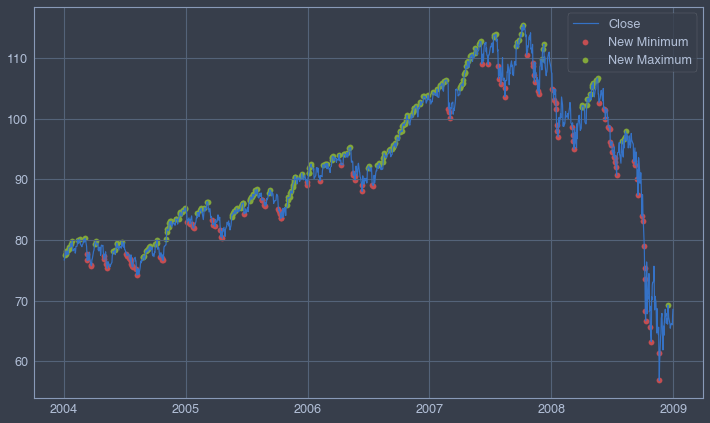

In [17]:
fig, ax = plt.subplots()
ax.plot(spy_close.loc['2004':'2008'].index, spy_close.loc['2004':'2008']['Close'], label='Close')
ax.scatter(spy_close_min.loc['2004':'2008'].index, spy_close_min.loc['2004':'2008']['Close'], label='New Minimum', c='r')
ax.scatter(spy_close_max.loc['2004':'2008'].index, spy_close_max.loc['2004':'2008']['Close'], label='New Maximum', c='g')
ax.grid(True)
plt.legend()

In [18]:
# us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
dr = pd.bdate_range(spy_close.index[50], periods=4, freq='B')[::-1]
dr

DatetimeIndex(['2002-04-17', '2002-04-16', '2002-04-15', '2002-04-12'], dtype='datetime64[ns]', freq='-1B')

In [19]:
row = spy_close.iloc[18]
spy_close.index.get_loc(row.name)

18

In [20]:
idx = spy_close.index.get_loc(spy_close.index[13])
spy_close.iloc[idx - 4: idx]['New Minimum'][spy_close.iloc[idx - 4: idx]['New Minimum']], spy_close.iloc[idx]

(Series([], Name: New Minimum, dtype: bool), Close          72.66
 20d_min        72.17
 20d_max        76.07
 New Maximum    False
 New Minimum    False
 Name: 2002-02-19 00:00:00, dtype: object)

In [21]:
len(spy_close.loc[dr]['New Minimum'][spy_close.loc[dr]['New Minimum']])

1

In [22]:
idx = spy_close.index.get_loc(spy_close.index[69])
l = len(spy_close.iloc[idx - 4: idx]['New Minimum'][spy_close.iloc[idx - 4: idx]['New Minimum']])
if not 0:
    print(1)
else:
    print(0)
l

1


2

In [23]:
spy_position = spy_close.loc['2004':'2008'].copy()
spy_position

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2004-01-02,76.72,73.27,76.76,False,False
2004-01-05,77.56,73.27,77.56,True,False
2004-01-06,77.63,73.27,77.63,True,False
2004-01-07,77.89,73.27,77.89,True,False
2004-01-08,78.20,73.27,78.20,True,False
...,...,...,...,...,...
2008-12-24,65.85,61.89,69.26,False,False
2008-12-26,66.23,61.89,69.26,False,False
2008-12-29,66.04,61.89,69.26,False,False


In [24]:
spy_close.loc['2004-04-08']

Close          79.16
20d_min        75.76
20d_max        79.79
New Maximum    False
New Minimum    False
Name: 2004-04-08 00:00:00, dtype: object

In [25]:
spy_close.loc['2004':'2008']

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2004-01-02,76.72,73.27,76.76,False,False
2004-01-05,77.56,73.27,77.56,True,False
2004-01-06,77.63,73.27,77.63,True,False
2004-01-07,77.89,73.27,77.89,True,False
2004-01-08,78.20,73.27,78.20,True,False
...,...,...,...,...,...
2008-12-24,65.85,61.89,69.26,False,False
2008-12-26,66.23,61.89,69.26,False,False
2008-12-29,66.04,61.89,69.26,False,False


In [26]:
idx = spy_position.index.get_loc(spy_position.index[49])
l = len(spy_position.iloc[idx - 4: idx]['New Minimum'][spy_position.iloc[idx - 4: idx]['New Minimum']])
l

2

In [33]:
spy_position.iloc[:21]

,Close,20d_min,20d_max,New Maximum,New Minimum,position
Date,,,,,,
2004-01-02,76.72,73.27,76.76,False,False,NaN
2004-01-05,77.56,73.27,77.56,True,False,NaN
2004-01-06,77.63,73.27,77.63,True,False,NaN
2004-01-07,77.89,73.27,77.89,True,False,NaN
2004-01-08,78.20,73.27,78.20,True,False,0.0
2004-01-09,77.52,73.87,78.20,False,False,0.0
2004-01-12,78.09,73.87,78.20,False,False,0.0
2004-01-13,77.64,73.87,78.20,False,False,0.0
2004-01-14,78.29,74.25,78.29,True,False,0.0


In [41]:
# разместите для целей входа покупающий стоп на 5—10 тиков выше предыдущего 20-дневного минимума
ADD_TICKS = 0.05

prepare = False
order_level_buy = ADD_TICKS
def turtle_soup(data):
    global prepare
    global order_level_buy
    
    if prepare and order_level_buy == data['Close']:
        prepare = False
        order_level_buy = ADD_TICKS
        return 1

    if data['New Minimum']:
        if not prepare:
            idx = spy_close.index.get_loc(data.name)
            l = len(spy_close.iloc[idx - 4: idx]['New Minimum'][spy_close.iloc[idx - 4: idx]['New Minimum']])
            if not l:
                prepare = True
                order_level_buy += spy_close.iloc[idx-1]['20d_min']
    return 0
#     if data['New Minimum'] and len(previous_4_days_period_minimums) == 0:
#         if current_price < previous_minimum:
#             prepare = True
#             order_buy_limit = previous_minimum + 5
#             order_stop_loss = current_price - 1
#     if prepare and current_price == order_buy_limit:
#         position = 1
#     if prepare and current_price == order_stop_loss:
#         position = 0
#         prepare = False

In [36]:
spy_position['position'] = spy_position[4:].apply(turtle_soup, axis=1)
spy_position.dropna()

,Close,20d_min,20d_max,New Maximum,New Minimum,position
Date,,,,,,
2004-01-08,78.20,73.27,78.20,True,False,0.0
2004-01-09,77.52,73.87,78.20,False,False,0.0
2004-01-12,78.09,73.87,78.20,False,False,0.0
2004-01-13,77.64,73.87,78.20,False,False,0.0
2004-01-14,78.29,74.25,78.29,True,False,0.0
...,...,...,...,...,...,...
2008-12-24,65.85,61.89,69.26,False,False,0.0
2008-12-26,66.23,61.89,69.26,False,False,0.0
2008-12-29,66.04,61.89,69.26,False,False,0.0


In [37]:
spy_position[spy_position['position'] == 1].count()

Close          0
20d_min        0
20d_max        0
New Maximum    0
New Minimum    0
position       0
dtype: int64

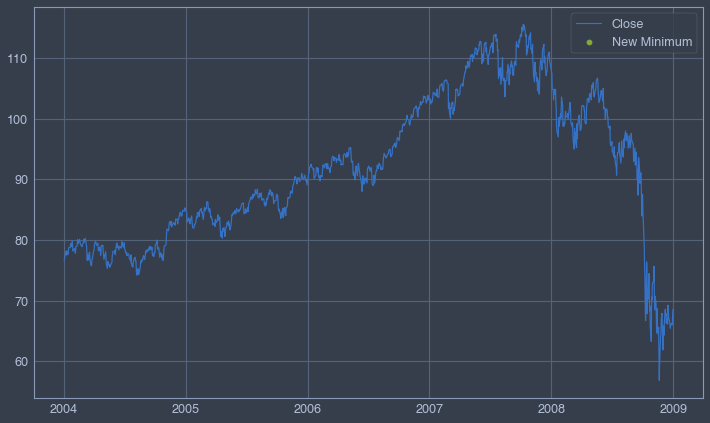

In [38]:
spy_min_position = spy_position[spy_position['position'] == 1]
fig, ax = plt.subplots()
ax.plot(spy_position.index, spy_position['Close'], label='Close')
ax.scatter(spy_min_position.index, spy_min_position['Close'], label='New Minimum', c='g')
ax.grid(True)
plt.legend()

In [42]:
spy_close['position'] = spy_close[4:].apply(turtle_soup, axis=1)
spy_close[spy_close['position'] == 1].count()

Close          1
20d_min        1
20d_max        1
New Maximum    1
New Minimum    1
position       1
dtype: int64

In [47]:
idx = 234
# spy_close.iloc[idx - 4: idx]['New Minimum'][spy_close.iloc[idx - 4: idx]['New Minimum']]
spy_close.iloc[idx - 1]['20d_min']

59.3

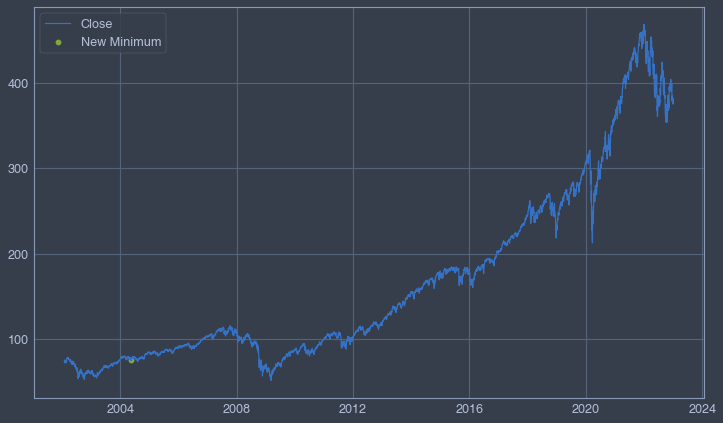

In [43]:
spy_min_position = spy_close[spy_close['position'] == 1]
fig, ax = plt.subplots()
ax.plot(spy_close.index, spy_close['Close'], label='Close')
ax.scatter(spy_min_position.index, spy_min_position['Close'], label='New Minimum', c='g')
ax.grid(True)
plt.legend()